In [14]:
import urllib
import os
import zipfile

In [9]:
pop_zip = 'https://general-assembly-project-5.s3.amazonaws.com/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals-rev11_2020_30_sec_tif.zip'

In [19]:
def retrieve_pop_zip(pop_zip_link):
    urllib.request.urlretrieve(pop_zip_link, os.path.basename(pop_zip_link))
    with zipfile.ZipFile(os.path.basename(pop_zip_link),"r") as zip_ref:
        zip_ref.extractall()

In [20]:
retrieve_pop_zip(pop_zip)

In [23]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd

In [24]:
dem_fp = "/Users/danielmsheehan/general_assembly/github/projects/project_5/delta/workspaces/danny/gpw_v4_population_count_adjusted_to_2015_unwpp_country_totals_rev11_2020_30_sec.tif"

In [25]:
dem = rasterio.open(dem_fp)

In [26]:
kallio_q = "Kallio, Helsinki, Finland"
pihlajamaki_q = "Pihlajamäki, Malmi, Helsinki, Finland"

In [27]:
kallio = ox.gdf_from_place(kallio_q)
pihlajamaki = ox.gdf_from_place(pihlajamaki_q)

In [28]:
kallio = kallio.to_crs(crs=dem.crs.data)
pihlajamaki = pihlajamaki.to_crs(crs=dem.crs.data)

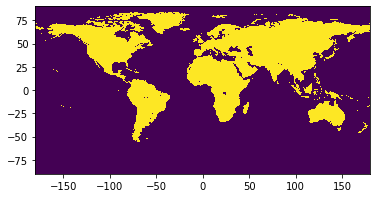

<Figure size 432x288 with 0 Axes>

In [41]:
ax = show((dem, 1))

kallio.plot(ax=ax, facecolor='None', edgecolor='red', linewidth=12)
pihlajamaki.plot(ax=ax, facecolor='None', edgecolor='blue', linewidth=12)
            

In [39]:
array = dem.read(1)
# 

In [42]:
dem.affine

AttributeError: 'DatasetReader' object has no attribute 'affine'

In [40]:
zs_kallio = zonal_stats(kallio, array, stats=['min', 'max', 'mean', 'median', 'majority'])
zs_pihla = zonal_stats(pihlajamaki, array, stats=['min', 'max', 'mean', 'median', 'majority'])

ValueError: Specify affine transform for numpy arrays

In [31]:
stats = zonal_stats("tests/data/polygons.shp",
...                     "tests/data/slope.tif",
...                     stats=['min', 'max', 'median', 'majority', 'sum'])

RasterioIOError: tests/data/slope.tif: No such file or directory